# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.36 which is incompatible.
jupyter-console 6.4.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 5.2.4 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

##  Building the project here 
###  Multi-Agent Deep Detrministic Policy Gradient (MADDPG)
### Actor - Critic method with decentralized actor and centralized critic (following approach from Lowe and Wu https://papers.nips.cc/paper/7217-multi-agent-actor-critic-for-mixed-cooperative-competitive-environments.pdf 
#### Modified DDPG_agent.py from Udacity repository that will be imported
#### tennis_model.py for the Actor and Critic nn models 


In [7]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

!python -m pip install pyvirtualdisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

In [8]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)


Number of agents: 2
Size of each action: 2


In [9]:

# examine the state space 

states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -7.98782539 -1.5        -0.          0.
 -7.11741829  5.99607611 -0.          0.        ]


In [10]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677


## Initialize

In [11]:
#from maddpg_agent import Agent
from maddpg_agent1 import Agent
import time


In [12]:
agents = []

for i in range(num_agents):
    agents.append(Agent(state_size=state_size, action_size=action_size, random_seed=4))

In [13]:
def maddpg_run(n_episodes=2500, print_every=100, num_learn=4, goal = 0.5):
    scores_deque = deque(maxlen=print_every)
    all_scores = []
    all_avg_scores = []
    
    for i_episode in (range(1, n_episodes+1)):
        env_info = env.reset(train_mode=True)[brain_name]
        #states = np.reshape(env_info.vector_observations, (1, 48))  # 24 states per agent
        
        states = env_info.vector_observations
        
        individual_scores = np.zeros(num_agents)
        while True:
            
            actions = np.random.randn(num_agents, action_size)
            
            #action_00 = agent_00.act(states)
            #action_01 = agent_01.act(states)
            
            #actions = np.concatenate((action_00, action_01), axis=0).flatten()
            
            for idx in range(num_agents):
                agents[idx].reset()
                actions[idx] = agents[idx].act(states[idx])
            
            env_info = env.step(actions)[brain_name]
            
            
            #next_states =  np.reshape(env_info.vector_observations, (1, 48))  # 24 states per agent
            
            next_states =  env_info.vector_observations
            
            rewards = env_info.rewards
            
            dones = env_info.local_done

            for idx in range(num_agents):
                agents[idx].step(states, actions, rewards, next_states, dones, i_episode)
            
            individual_scores += rewards
            states = next_states
            
            if np.any(dones):
                break
        
        ##Manage the agents scores for the episodes till the goal is acheived.
        
        episode_score = np.max(individual_scores)
        all_scores.append(episode_score)
        
        scores_deque.append(episode_score)
        
        ## Get the average scrore of the last 100
        avg_score = np.mean(scores_deque)
        
        all_avg_scores.append(avg_score)
        
        ## Print every 100 episodes score
        
        if i_episode % print_every == 0:
            print(f'Episode: {i_episode} Total Average Score: {avg_score} Max Score: {np.max(all_scores)}' )
            
        ## Check if avg score reached the goal and break
        
        if avg_score > goal:
            print(f' The Environment is solved in {i_episode} episodes with Average score of {avg_score}')
            
            ## Write the models 
            
            for idx, agent in enumerate(agents):
            
                actor_local_name =  'actor_local_agent_' + str(idx) + '.pth'
                critic_local_name = 'critic_local_agent_' + str(idx) + '.pth'
                torch.save(agent.actor_local.state_dict(), actor_local_name)
                torch.save(agent.critic_local.state_dict(), critic_local_name)
            
            break
    
    return all_scores, all_avg_scores

In [14]:
# agent_00 = Agent(state_size=state_size, action_size=action_size, num_agents = 1, random_seed=0)
# agent_01 = Agent(state_size=state_size, action_size=action_size, num_agents = 1, random_seed=0)

In [15]:
agent_00 = Agent(state_size=state_size, action_size=action_size, random_seed=0)
agent_01 = Agent(state_size=state_size, action_size=action_size, random_seed=0)

In [16]:
a_s, a_a_s = maddpg_run()

Episode: 100 Total Average Score: 0.007000000104308128 Max Score: 0.10000000149011612
Episode: 200 Total Average Score: 0.0010000000149011613 Max Score: 0.10000000149011612
Episode: 300 Total Average Score: 0.0 Max Score: 0.10000000149011612
Episode: 400 Total Average Score: 0.0 Max Score: 0.10000000149011612
Episode: 500 Total Average Score: 0.0010000000149011613 Max Score: 0.10000000149011612
Episode: 600 Total Average Score: 0.021000000312924386 Max Score: 0.10000000149011612
Episode: 700 Total Average Score: 0.03400000050663948 Max Score: 0.10000000149011612
Episode: 800 Total Average Score: 0.03500000052154064 Max Score: 0.10000000149011612
Episode: 900 Total Average Score: 0.06500000100582838 Max Score: 0.19000000320374966
Episode: 1000 Total Average Score: 0.07910000132396817 Max Score: 0.19000000320374966
Episode: 1100 Total Average Score: 0.1171000018157065 Max Score: 0.5000000074505806
Episode: 1200 Total Average Score: 0.11780000176280737 Max Score: 0.5000000074505806
 The E

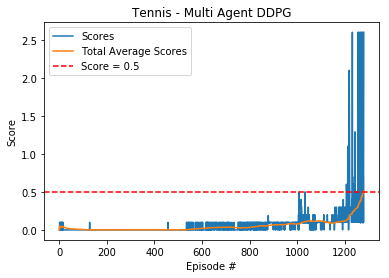

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(a_s)+1), a_s, label='Scores')
plt.plot(np.arange(1, len(a_s)+1), a_a_s, label='Total Average Scores')
plt.title("Tennis - Multi Agent DDPG")
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.axhline(y=0.5, color='r', linestyle='--', label='Score = 0.5')
plt.legend(loc='best')
plt.savefig('Tennis_score.png')
plt.show()

## I had to go thro lot of iterations to get the score up but suddenly the goal is acheived with a huge jumb. So changing the  function to run full 2500 episodes to check how the training goes till the end
## I tried three times the below function but the lab is shutting down as later steps are taking almost an hour for each episode and I have to give up my experiment

In [18]:
def maddpg_run_f(n_episodes=2500, print_every=100, num_learn=4, goal = 0.5):
    scores_deque = deque(maxlen=print_every)
    all_scores = []
    all_avg_scores = []
    
    goal_reached = False
    
    for i_episode in (range(1, n_episodes+1)):
        env_info = env.reset(train_mode=True)[brain_name]
        #states = np.reshape(env_info.vector_observations, (1, 48))  # 24 states per agent
        
        states = env_info.vector_observations
        
        individual_scores = np.zeros(num_agents)
        while True:
            
            actions = np.random.randn(num_agents, action_size)
            
            #action_00 = agent_00.act(states)
            #action_01 = agent_01.act(states)
            
            #actions = np.concatenate((action_00, action_01), axis=0).flatten()
            
            for idx in range(num_agents):
                agents[idx].reset()
                actions[idx] = agents[idx].act(states[idx])
            
            env_info = env.step(actions)[brain_name]
            
            
            #next_states =  np.reshape(env_info.vector_observations, (1, 48))  # 24 states per agent
            
            next_states =  env_info.vector_observations
            
            rewards = env_info.rewards
            
            dones = env_info.local_done

            for idx in range(num_agents):
                agents[idx].step(states, actions, rewards, next_states, dones, i_episode)
            
            individual_scores += rewards
            states = next_states
            
            if np.any(dones):
                break
        
        ##Manage the agents scores for the episodes till the goal is acheived.
        
        episode_score = np.max(individual_scores)
        all_scores.append(episode_score)
        
        scores_deque.append(episode_score)
        
        ## Get the average scrore of the last 100
        avg_score = np.mean(scores_deque)
        
        all_avg_scores.append(avg_score)
        
        ## Print every 100 episodes score
        
        if i_episode % print_every == 0:
            print(f'Episode: {i_episode} Total Average Score: {avg_score} Max Score: {np.max(all_scores)}' )
            
        ## Check if avg score reached the goal and break
       
        if avg_score > goal and goal_reached is False:
            print(f' The Environment is solved in {i_episode} episodes with Average score of {avg_score}')
            
            goal_reached = True
            
            ## Write the models when it reached the goal
            
            for idx, agent in enumerate(agents):
            
                actor_local_name =  'actor_local_agent_' + str(idx) + '.pth'
                critic_local_name = 'critic_local_agent_' + str(idx) + '.pth'
                torch.save(agent.actor_local.state_dict(), actor_local_name)
                torch.save(agent.critic_local.state_dict(), critic_local_name)
    ## Write the models when it reached the end
    
    for idx, agent in enumerate(agents):
        actor_local_name =  '2500Epi_actor_local_agent_' + str(idx) + '.pth'
        critic_local_name = '2500Epi_critic_local_agent_' + str(idx) + '.pth'
        torch.save(agent.actor_local.state_dict(), actor_local_name)
        torch.save(agent.critic_local.state_dict(), critic_local_name)    

    
    return all_scores, all_avg_scores

In [ ]:
a_s, a_a_s = maddpg_run_f()

Episode: 100 Total Average Score: 0.0019000000320374966 Max Score: 0.10000000149011612
Episode: 200 Total Average Score: 0.0 Max Score: 0.10000000149011612
Episode: 300 Total Average Score: 0.0 Max Score: 0.10000000149011612
Episode: 400 Total Average Score: 0.0 Max Score: 0.10000000149011612
Episode: 500 Total Average Score: 0.0 Max Score: 0.10000000149011612
Episode: 600 Total Average Score: 0.004000000059604645 Max Score: 0.10000000149011612
Episode: 700 Total Average Score: 0.00800000011920929 Max Score: 0.10000000149011612
Episode: 800 Total Average Score: 0.009000000134110451 Max Score: 0.10000000149011612
Episode: 900 Total Average Score: 0.005800000093877315 Max Score: 0.10000000149011612
Episode: 1000 Total Average Score: 0.0 Max Score: 0.10000000149011612
Episode: 1100 Total Average Score: 0.01160000018775463 Max Score: 0.10000000149011612
Episode: 1200 Total Average Score: 0.06340000104159117 Max Score: 0.20000000298023224
Episode: 1300 Total Average Score: 0.099800001643598

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(a_s)+1), a_s, label='Scores')
plt.plot(np.arange(1, len(a_s)+1), a_a_s, label='Total Average Scores')
plt.title("Tennis - Multi Agent DDPG (2500 Episodes)")
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.axhline(y=0.5, color='r', linestyle='--', label='Score = 0.5')
plt.legend(loc='best')
plt.savefig('Tennis_score_2500Episode.png')
plt.show()

# Evaluation
## Load the trained model and check the results

In [18]:
agents[0].actor_local.load_state_dict(torch.load('2500Epi_actor_local_agent_0.pth', map_location='cpu'))
agents[1].actor_local.load_state_dict(torch.load('2500Epi_actor_local_agent_1.pth', map_location='cpu'))
agents[0].critic_local.load_state_dict(torch.load('2500Epi_critic_local_agent_0.pth', map_location='cpu'))
agents[1].critic_local.load_state_dict(torch.load('2500Epi_critic_local_agent_1.pth', map_location='cpu'))

for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions0 = agents[0].act(states, False)     # select action for loaded model for agent0
        actions1 = agents[1].act(states, False)     # select action for loaded model for agent1
        env_info = env.step(actions0, actions1)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))



In [20]:
env.close()